# ML Challenge (Optional)

Train, test, optimize, and analyze the performance of a classification model using a methodology of your choice for the randomly generated moons dataset.

You are not being evaluated for the performance of your model. Instead, we are interested in whether you can implement a simple but rigorous ML workflow.

Show all of your work in this notebook.

In [40]:
# you are free to use any package you deem fit
import numpy as np 
import tensorflow as tf
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense

import warnings
warnings.filterwarnings("ignore")

In [41]:
from sklearn.model_selection import train_test_split

## Dataset

In [10]:
# DO NOT MODIFY
from sklearn.datasets import make_moons

X, Y = make_moons(random_state=42, n_samples=(50, 450), noise=0.25)

In [12]:
pd.DataFrame(X).head()

,0,1
0,1.569404,-0.133388
1,0.496307,0.443235
2,1.783240,-0.230247
3,0.551058,-0.037493
4,0.257809,0.583334


In [19]:
pd.DataFrame(Y).describe()

,0
count,500.0000
mean,0.9000
std,0.3003
min,0.0000
25%,1.0000
50%,1.0000
75%,1.0000
max,1.0000


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

## Training

In [24]:
model = Sequential()

model.add(Dense(50, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics= ['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 50)                150       
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
results = model.fit(X_train, Y_train , epochs=100)

Epoch 1/100
11/11 [==============================] - 0s 625us/step - loss: 0.6724 - accuracy: 0.6771
Epoch 2/100
11/11 [==============================] - 0s 474us/step - loss: 0.6213 - accuracy: 0.8886
Epoch 3/100
11/11 [==============================] - 0s 442us/step - loss: 0.5736 - accuracy: 0.9143
Epoch 4/100
11/11 [==============================] - 0s 435us/step - loss: 0.5284 - accuracy: 0.9143
Epoch 5/100
11/11 [==============================] - 0s 485us/step - loss: 0.4875 - accuracy: 0.9200
Epoch 6/100
11/11 [==============================] - 0s 512us/step - loss: 0.4498 - accuracy: 0.9229
Epoch 7/100
11/11 [==============================] - 0s 522us/step - loss: 0.4152 - accuracy: 0.9286
Epoch 8/100
11/11 [==============================] - 0s 522us/step - loss: 0.3825 - accuracy: 0.9286
Epoch 9/100
11/11 [==============================] - 0s 525us/step - loss: 0.3539 - accuracy: 0.9286
Epoch 10/100
11/11 [==============================] - 0s 471us/step - loss: 0.3275 - accura

## Testing / Optimization

In [32]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0], 'Test accuracy:', score[1])

Test score: 0.12891821563243866 Test accuracy: 0.9466666579246521


In [ ]:
# try improve performance by adding more layers

In [42]:
model_new = model = Sequential()

model_new.add(Dense(50, input_dim=2, activation='relu'))
model_new.add(Dense(64, activation='relu'))
model_new.add(Dense(32, activation='relu'))
model_new.add(Dense(1, activation='sigmoid'))

model_new.compile(loss='binary_crossentropy', optimizer='adam', metrics= ['accuracy'])

print(model_new.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                150       
                                                                 
 dense_5 (Dense)             (None, 64)                3264      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,527
Trainable params: 5,527
Non-trainable params: 0
_________________________________________________________________
None


In [46]:
# try early_stopping to tackle overfitting
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
results_new = model_new.fit(X_train, Y_train , epochs=100, callbacks = [early_stopping])

Epoch 1/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0599 - accuracy: 0.9714
Epoch 2/100
11/11 [==============================] - 0s 812us/step - loss: 0.0551 - accuracy: 0.9743
Epoch 3/100
11/11 [==============================] - 0s 682us/step - loss: 0.0576 - accuracy: 0.9743
Epoch 4/100
11/11 [==============================] - 0s 675us/step - loss: 0.0556 - accuracy: 0.9800
Epoch 5/100
11/11 [==============================] - 0s 632us/step - loss: 0.0572 - accuracy: 0.9771
Epoch 6/100
11/11 [==============================] - 0s 693us/step - loss: 0.0561 - accuracy: 0.9743
Epoch 7/100
11/11 [==============================] - 0s 624us/step - loss: 0.0560 - accuracy: 0.9771
Epoch 8/100
11/11 [==============================] - 0s 677us/step - loss: 0.0560 - accuracy: 0.9771
Epoch 9/100
11/11 [==============================] - 0s 616us/step - loss: 0.0546 - accuracy: 0.9771
Epoch 10/100
11/11 [==============================] - 0s 680us/step - loss: 0.0542 - accuracy

In [47]:
score_new = model_new.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0], 'Test accuracy:', score[1])

Test score: 0.12891821563243866 Test accuracy: 0.9466666579246521


## Performance Analysis

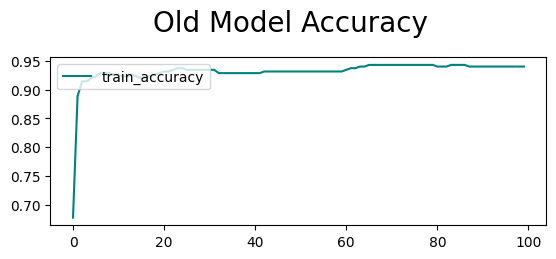

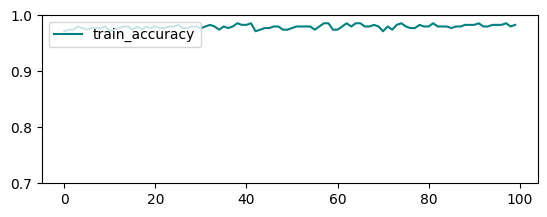

In [58]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(results.history['accuracy'], color='teal', label='train_accuracy')
fig.suptitle('Old Model Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

plt.subplot(2,1,2)
plt.plot(results_new.history['accuracy'], color='teal', label='train_accuracy')
plt.ylim(0.7, 1)
fig.suptitle('New Model Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

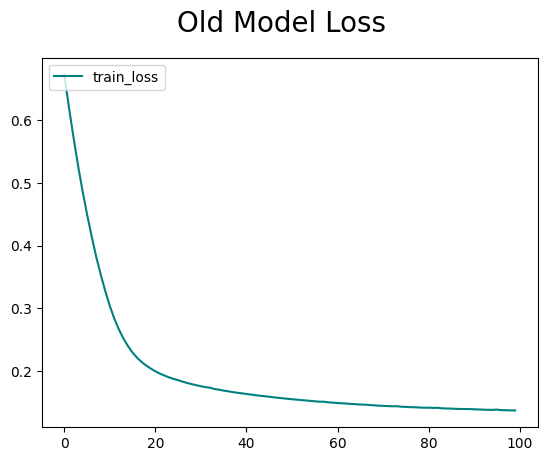

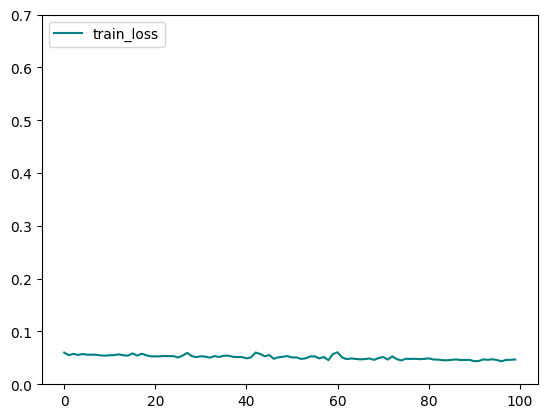

In [60]:
fig = plt.figure()

plt.plot(results.history['loss'], color='teal', label='train_loss')
fig.suptitle('Old Model Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

plt.plot(results_new.history['loss'], color='teal', label='train_loss')
plt.ylim(0, 0.7)
fig.suptitle('New Model Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### The new model with more layers and early_stopping performed better on training set than the original model, but it there are no significant difference between the two on testing set both achieving 94.66% accuracy